In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from outcome_utilities.clinical_outcome import Clinical_outcome

import warnings
warnings.filterwarnings("ignore")

In [2]:
mrs_dists = pd.read_csv(
    './outcome_utilities/mrs_dist_probs_cumsum.csv', index_col='Stroke type')
outcome_model = Clinical_outcome(mrs_dists, patients=1000)
time_to_ivt = 120
time_to_mt = 240
outcomes = outcome_model.calculate_outcomes(time_to_ivt, time_to_mt)

In [3]:
outcomes

{'lvo_untreated_probs': array([0.053, 0.088, 0.148, 0.152, 0.237, 0.14 , 0.182]),
 'nlvo_untreated_probs': array([0.206, 0.258, 0.116, 0.12 , 0.166, 0.058, 0.076]),
 'lvo_ivt_probs': array([0.099, 0.078, 0.146, 0.147, 0.218, 0.123, 0.189]),
 'lvo_mt_probs': array([0.122, 0.125, 0.152, 0.179, 0.184, 0.094, 0.144]),
 'nlvo_ivt_probs': array([0.351, 0.227, 0.109, 0.128, 0.1  , 0.029, 0.056]),
 'lvo_untreated_cum_probs': array([0.053, 0.141, 0.289, 0.441, 0.678, 0.818, 1.   ]),
 'nlvo_untreated_cum_probs': array([0.206, 0.464, 0.58 , 0.7  , 0.866, 0.924, 1.   ]),
 'lvo_ivt_cum_probs': array([0.099, 0.177, 0.323, 0.47 , 0.688, 0.811, 1.   ]),
 'lvo_mt_cum_probs': array([0.122, 0.247, 0.399, 0.578, 0.762, 0.856, 1.   ]),
 'nlvo_ivt_cum_probs': array([0.351, 0.578, 0.687, 0.815, 0.915, 0.944, 1.   ]),
 'lvo_ivt_shift': array([ 0.046, -0.01 , -0.002, -0.005, -0.019, -0.017,  0.007]),
 'lvo_mt_shift': array([ 0.069,  0.037,  0.004,  0.027, -0.053, -0.046, -0.038]),
 'nlvo_ivt_shift': array([ 0.

## Plot mRS distributions

In [4]:
plt.style.use('seaborn-colorblind')
def draw_horizontal_bar(dist,label=' '):
    """
    Draw a stacked horizontal bar chart of the values in 'dist'.
    
    dist  - list or np.array. The probability distribution 
            (non-cumulative).
    label - string. The name printed next to these stacked bars.
    """
    fig = plt.figure(figsize=(8,2))
    ax = fig.add_subplot()
    ax.set_frame_on(False)
    
    colour_list = plt.rcParams['axes.prop_cycle'].by_key()['color']
    # The first bar will start at this point on the x-axis:
    left = 0
    for i in range(len(dist)):
        # Draw a bar starting from 'left', the end of the previous bar,
        # with a width equal to the probability of this mRS:
        ax.barh(' ', width=dist[i], left=left, height=0.5, 
                 label=f'{i}', edgecolor='k', color=colour_list[i%6])
        # Update 'left' with the width of the current bar so that the 
        # next bar drawn will start in the correct place.    
        left += dist[i]
    ax.set_xlabel('Probability')
    ax.set_title(label)
    ax.legend(loc='center',ncol=7, title='mRS', 
               bbox_to_anchor=[0.5,0.0,0.0,-1.20])   # Legend below axis.

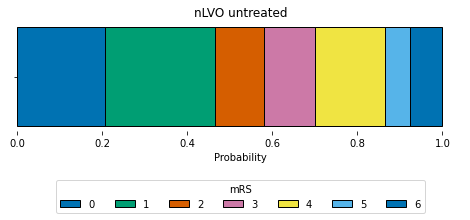

In [5]:
bins = np.diff(outcomes['nlvo_untreated_cum_probs'], prepend=0)
draw_horizontal_bar(bins, 'nLVO untreated')

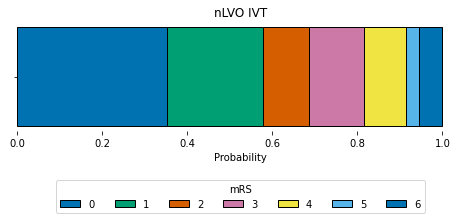

In [6]:
bins = np.diff(outcomes['nlvo_ivt_cum_probs'], prepend=0)
draw_horizontal_bar(bins, 'nLVO IVT')

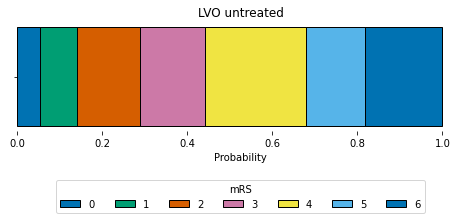

In [7]:
bins = np.diff(outcomes['lvo_untreated_cum_probs'], prepend=0)
draw_horizontal_bar(bins, 'LVO untreated')

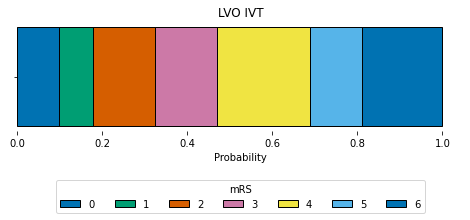

In [8]:
bins = np.diff(outcomes['lvo_ivt_cum_probs'], prepend=0)
draw_horizontal_bar(bins, 'LVO IVT')

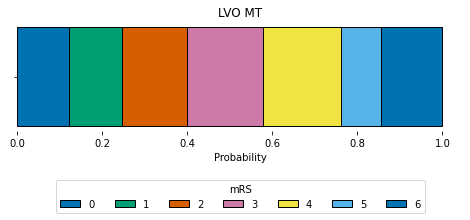

In [9]:
bins = np.diff(outcomes['lvo_mt_cum_probs'], prepend=0)
draw_horizontal_bar(bins, 'LVO MT')

## Plot changes in mRS proportions with treatment

In [10]:
def plot_shift(dist, label=' '):
    x=np.arange(7)
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot()
    ax.bar(x, dist)
    ax.hlines(0, -0.5, 6.5, color='k', linewidth=1)
    ax.set_xlabel('mRS')
    ax.set_ylabel('Change in probability')
    ax.set_title(label)
    plt.show()

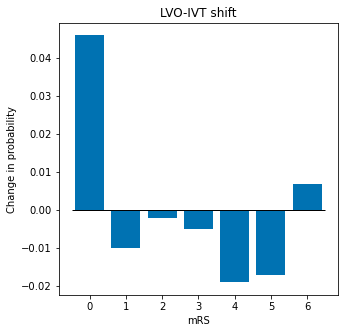

In [11]:
plot_shift(outcomes['lvo_ivt_shift'], 'LVO-IVT shift')

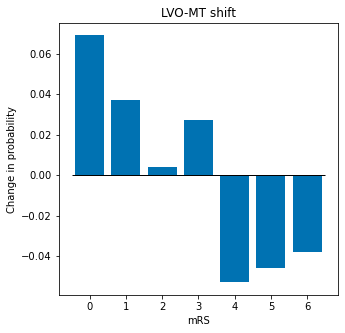

In [12]:
plot_shift(outcomes['lvo_mt_shift'], 'LVO-MT shift')

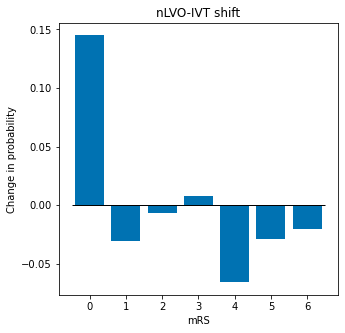

In [13]:
plot_shift(outcomes['nlvo_ivt_shift'], 'nLVO-IVT shift')

## Other stats

In [14]:
print('Mean mRS')
print('--------')
print('LVO untreated:', outcomes['lvo_untreated_mean_mRS'])
print('LVO IVT:', outcomes['lvo_ivt_mean_mRS'])
print('LVO MT:', outcomes['lvo_mt_mean_mRS'])
print('nLVO untreated:', outcomes['nlvo_untreated_mean_mRS'])
print('nLVO IVT:', outcomes['nlvo_ivt_mean_mRS'])

Mean mRS
--------
LVO untreated: 3.58
LVO IVT: 3.432
LVO MT: 3.036
nLVO untreated: 2.26
nLVO IVT: 1.71


In [15]:
print('Mean mRS shift')
print('--------------')
print('LVO IVT:', outcomes['lvo_ivt_mean_shift'])
print('LVO MT:', outcomes['lvo_mt_mean_shift'])
print('nLVO IVT:', outcomes['nlvo_ivt_mean_shift'])

Mean mRS shift
--------------
LVO IVT: -0.148
LVO MT: -0.607
nLVO IVT: -0.55


In [16]:
print('Proportion improved')
print('-------------------')
print('LVO IVT:', outcomes['lvo_mt_improved'])
print('LVO MT:', outcomes['lvo_ivt_improved'])
print('nLVO IVT:', outcomes['nlvo_ivt_improved'])

Proportion improved
-------------------
LVO IVT: 0.602
LVO MT: 0.155
nLVO IVT: 0.55
